In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [9]:
df1=df.rename({'R&D Spend':'Rds','Administration':'Admin','Marketing Spend':'Mkts'},axis=1)
df1

,Rds,Admin,Mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
df1.corr()

,Rds,Admin,Mkts,Profit
Rds,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mkts,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


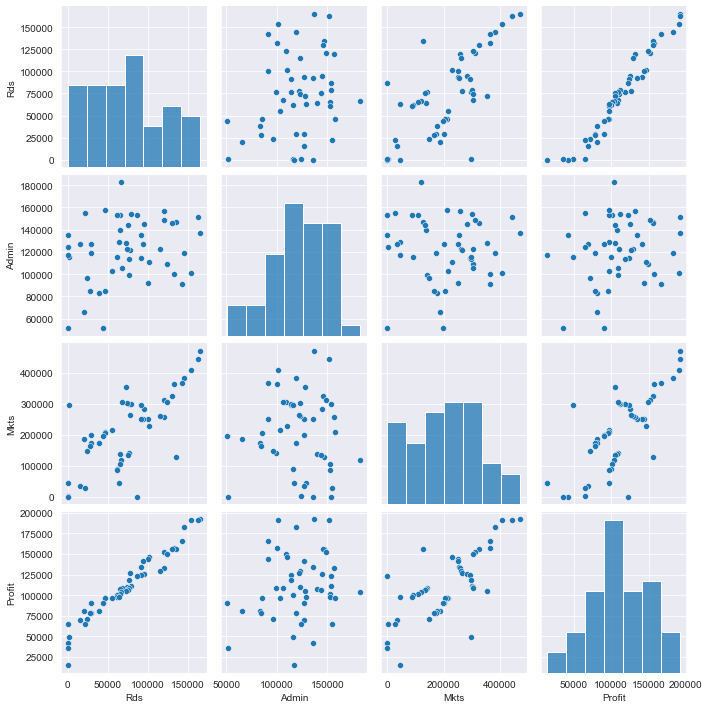

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

In [13]:
model=smf.ols("Profit~Rds+Admin+Mkts",data=df1).fit()

In [14]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
Rds              0.805715
Admin           -0.026816
Mkts             0.027228
dtype: float64

In [15]:
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 Rds          17.846374
 Admin        -0.525507
 Mkts          1.655077
 dtype: float64,
 Intercept    0.00000
 Rds          0.00000
 Admin        0.60176
 Mkts         0.10472
 dtype: float64)

In [16]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [18]:
slr_a=smf.ols("Profit~Admin",data=df1).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [21]:
slr_m=smf.ols("Profit~Mkts",data=df1).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    7.808356
 Mkts         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Mkts         4.381073e-10
 dtype: float64)

In [22]:
mlr_am=smf.ols("Profit~Admin+Mkts",data=df1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 Admin        2.467779
 Mkts         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Admin        1.729198e-02
 Mkts         9.727245e-11
 dtype: float64)

In [24]:
rsq_r=smf.ols("Rds~Admin+Mkts",data=df1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Admin~Rds+Mkts",data=df1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Mkts~Rds+Admin",data=df1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
df2={'Variables':['Rds','Admin','Mkts'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(df2)
Vif_df

,Variables,Vif
0,Rds,2.468903
1,Admin,1.175091
2,Mkts,2.326773


C:\Users\ZomAdmin\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


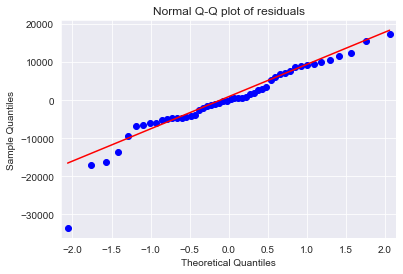

In [26]:

import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [28]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

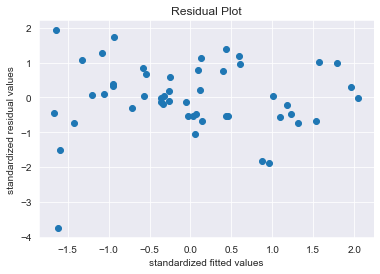

In [29]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

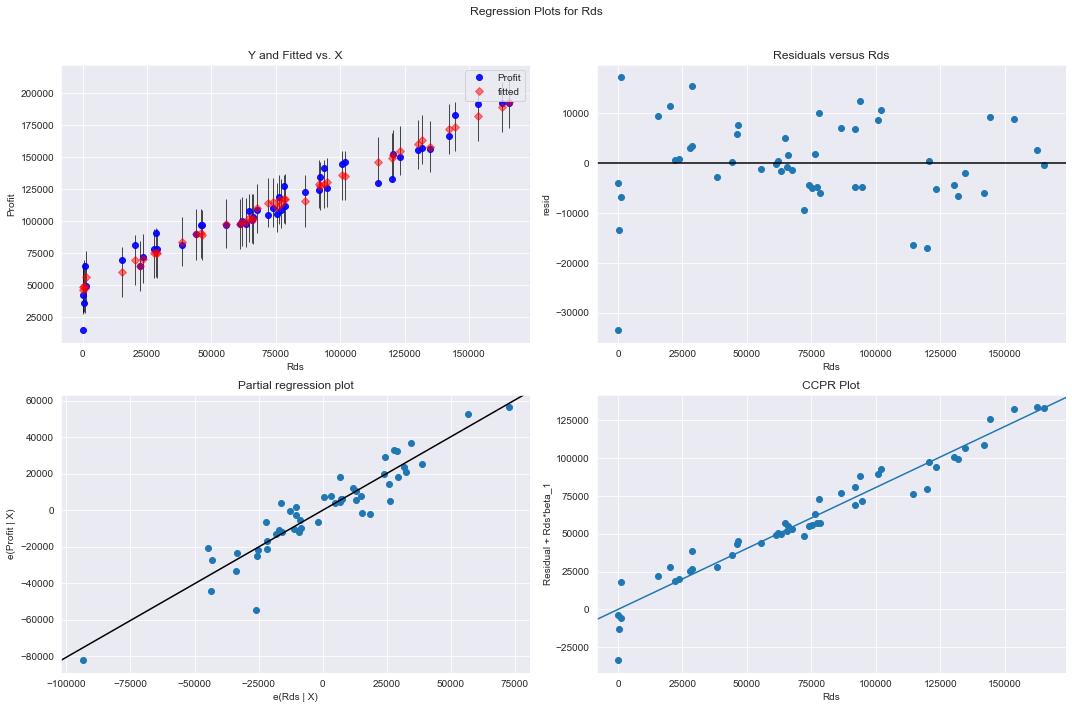

In [32]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Rds',fig=fig)
plt.show()

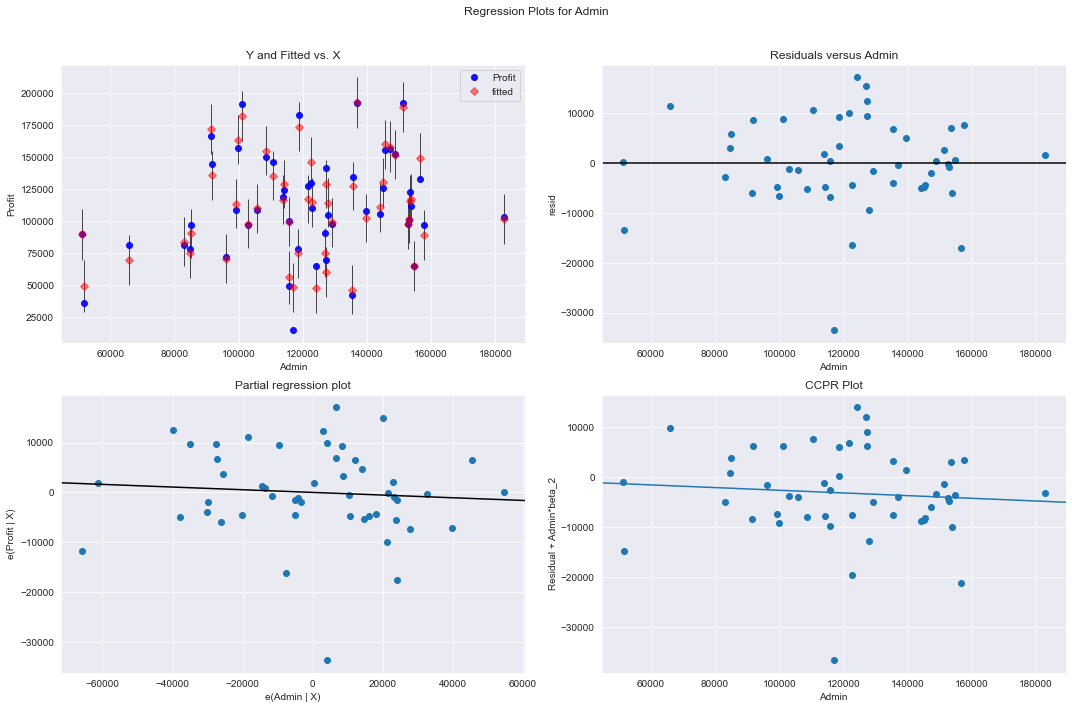

In [33]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Admin',fig=fig)
plt.show()

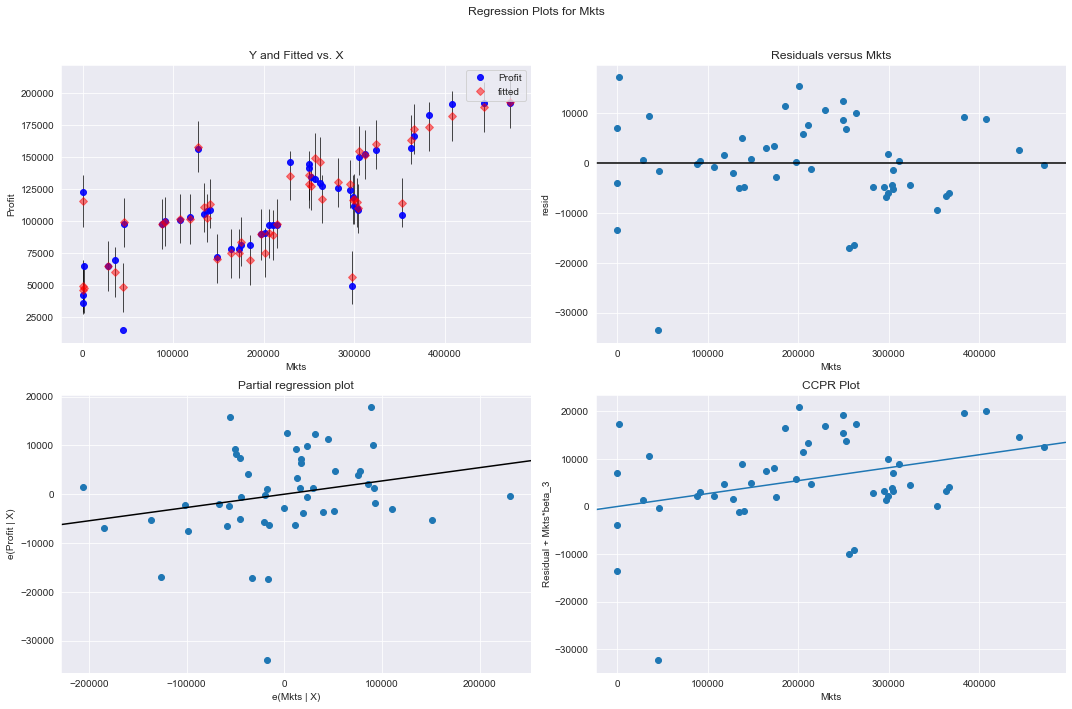

In [34]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Mkts',fig=fig)
plt.show()

In [35]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

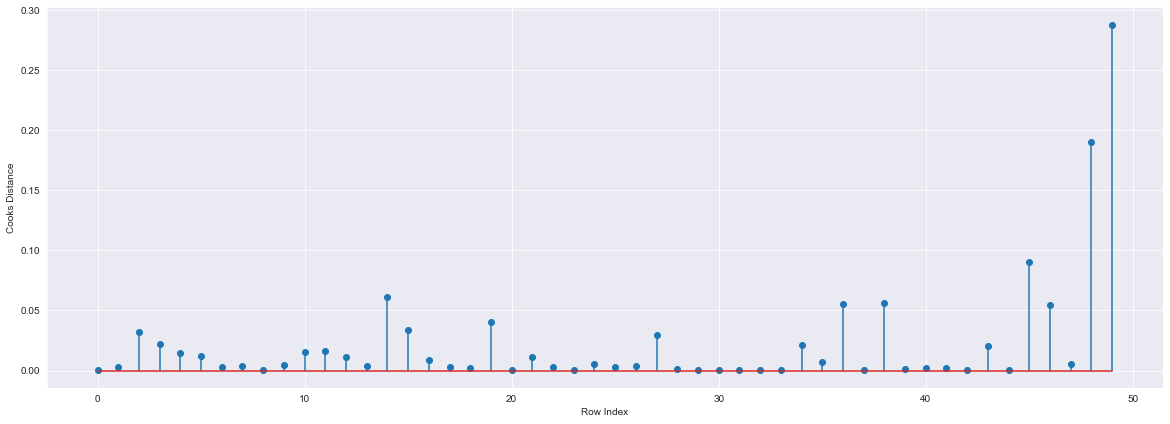

In [37]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

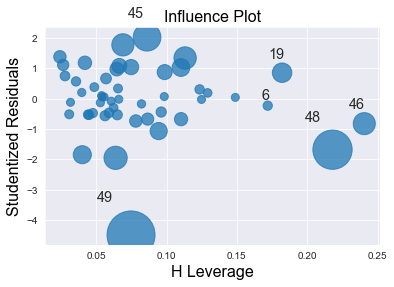

In [39]:
influence_plot(model)
plt.show()

In [40]:
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [47]:
df1[df1.index.isin([48,49])]

,Rds,Admin,Mkts,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [48]:
data=df1.drop(df1.index[[49]],axis=0).reset_index(drop=True)
data

,Rds,Admin,Mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [49]:
model2=smf.ols("Profit~Rds+Admin+Mkts",data=data).fit()

In [51]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~Rds+Admin+Mkts",data=data).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data=data.drop(data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data
    else:
        final_model=smf.ols("Profit~Rds+Admin+Mkts",data=data).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improv

In [52]:
final_model.rsquared 

0.9882757054424702

In [53]:
data

,Rds,Admin,Mkts,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


In [54]:
new_data=pd.DataFrame({'Rds':70000,"Admin":90000,"Mkts":140000},index=[0])
new_data

,Rds,Admin,Mkts
0,70000,90000,140000


In [55]:
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [57]:
pred_x=final_model.predict(data)
pred_x

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [58]:
D={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(D)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
